In [1]:
import numpy as np
from math import exp,log
import sys

Descente de gradient (généralités)
==================================

Descente de gradient pour $f(x) = (x-3)^2$

In [2]:
def optimise_univariate(step_size=0.4,max_epochs=30): 
    """
    Optimizes f(x) = (x-3)^2 (strictly convex) 
    """
    x=0
    for e in range(max_epochs):
        x -= step_size * 2*(x-3) #f’(x) = 2(x-3) 
        obj = (x-3)**2
        print(x,obj)
    return x

Exécution de la fonction de descente de gradient

In [3]:
optimise_univariate(step_size=0.4,max_epochs=30)

2.4000000000000004 0.3599999999999996
2.88 0.014400000000000026
2.976 0.000576000000000001
2.9952 2.303999999999919e-05
2.99904 9.216000000001381e-07
2.999808 3.6864000000073737e-08
2.9999616 1.4745600000165917e-09
2.99999232 5.898239999929943e-11
2.999998464 2.3592960002448256e-12
2.9999996928 9.437184006436271e-14
2.99999993856 3.774873624402381e-15
2.999999987712 1.5099494279330796e-16
2.9999999975424 6.039797275174871e-18
2.99999999950848 2.4159206563000214e-19
2.999999999901696 9.663682625200085e-21
2.9999999999803393 3.865438125551152e-22
2.999999999996068 1.5460355555759207e-23
2.9999999999992135 6.185539216080739e-25
2.999999999999843 2.471422329966908e-26
2.9999999999999685 9.941619558047801e-28
2.999999999999994 3.865418435582958e-29
2.9999999999999987 1.7749370367472766e-30
2.9999999999999996 1.9721522630525295e-31
3.0 0.0
3.0 0.0
3.0 0.0
3.0 0.0
3.0 0.0
3.0 0.0
3.0 0.0


3.0

Descente de gradient pour  $f(x_1,x_2)= x_1^2 + x_2^2+2x_1+8x_2$
 

In [4]:
def optimise_bivariate(step_size=0.4,max_epochs=30): 
    """
    Optimizes f(x1,x2) = x1^2+x2^2+2x1+8x2 (strictly convex) 
    """
    (x1,x2) = (0,0)
    for e in range(max_epochs):
        obj = x1**2+x2**2+2*x1+8*x2
        print((x1,x2),obj)
        x1,x2 = (x1-step_size*(2*x1+2),x2-step_size*(2*x2+8))
    obj = x1**2+x2**2+2*x1+8*x2
    print((x1,x2),obj)
    return (x1,x2)

In [5]:
optimise_bivariate()

(0, 0) 0
(-0.8, -3.2) -16.32
(-0.96, -3.84) -16.9728
(-0.992, -3.968) -16.998912000000004
(-0.9984, -3.9936) -16.99995648
(-0.99968, -3.99872) -16.999998259199998
(-0.999936, -3.999744) -16.999999930368
(-0.9999872, -3.9999488) -16.99999999721472
(-0.99999744, -3.99998976) -16.999999999888587
(-0.999999488, -3.999997952) -16.999999999995545
(-0.9999998976, -3.9999995904) -16.999999999999822
(-0.99999997952, -3.99999991808) -16.999999999999993
(-0.999999995904, -3.999999983616) -17.0
(-0.9999999991808, -3.9999999967232) -17.0
(-0.99999999983616, -3.99999999934464) -17.0
(-0.999999999967232, -3.999999999868928) -17.0
(-0.9999999999934464, -3.9999999999737854) -17.0
(-0.9999999999986893, -3.999999999994757) -17.0
(-0.9999999999997379, -3.9999999999989515) -17.0
(-0.9999999999999476, -3.9999999999997904) -17.0
(-0.9999999999999896, -3.9999999999999583) -17.0
(-0.9999999999999979, -3.9999999999999916) -17.0
(-0.9999999999999996, -3.9999999999999982) -17.0
(-0.9999999999999999, -3.9999999999

(-1.0, -4.0)

Régression logistique
=====================

In [6]:
raw_dataset = open("../data/logistic.dat")

Lecture des données
----------------------

In [7]:
dataset = list([ line.split() for line in raw_dataset])
print(dataset)

[['3', '7', '1'], ['4', '9', '1'], ['2', '10', '1'], ['1', '11', '1'], ['0', '9', '0'], ['-1', '7', '0'], ['-2', '2', '0'], ['-3', '3', '0']]


In [8]:
X = np.array( [(float(line[0]),float(line[1])) for line in dataset] )
print(X)

[[  3.   7.]
 [  4.   9.]
 [  2.  10.]
 [  1.  11.]
 [  0.   9.]
 [ -1.   7.]
 [ -2.   2.]
 [ -3.   3.]]


In [9]:
Y = np.array ([float(line[2]) for line in dataset])
print(Y)

[ 1.  1.  1.  1.  0.  0.  0.  0.]


Version non vectorisée
----------------------

In [10]:
def predict_success(x1,x2,w0,w1):
    return exp(x1*w0+x2*w1)/(1+(exp(x1*w0+x2*w1)))

In [11]:
def estimate_params(X,Y,alpha=0.5, max_epochs=30):
    w0,w1 = 0.0,0.0
    N = len(Y)
    print(w0,w1)
    for e in range(max_epochs):     
        partial0 = sum( X[i][0]*(Y[i] - predict_success(X[i][0],X[i][1],w0,w1)) for i in range(N))
        partial1 = sum( X[i][1]*(Y[i] - predict_success(X[i][0],X[i][1],w0,w1)) for i in range(N))
        w0 += alpha*partial0
        w1 += alpha*partial1  
        print(w0,w1)
    return (w0,w1)
        
    

In [12]:
estimate_params(X,Y,max_epochs=150)

0.0 0.0
4.0 4.0
5.74999999998 -5.24999999987
10.7499999951 13.2499999878
13.7424779761 2.75752200682
14.2405613025 -5.22906127645
15.7439577616 5.2788554383
16.2439577621 -2.72114456036
16.7490416499 2.80427147273
17.2224876799 -5.00985073718
18.7224876136 5.49014868385
19.2224876123 -2.5098513065
19.7223752039 2.98890260975
20.1066325313 -4.20089868208
21.4642598804 5.58723806365
21.9642598696 -2.41276186043
22.4591649449 3.03119395134
22.5713126935 -2.25384028906
23.0223693901 2.70778336545
23.0307821831 -1.85110618536
23.0632076649 -1.49442614727
23.0638704938 -1.48714151673
23.0644819393 -1.48042254175
23.0650495261 -1.4741864456
23.0655792229 -1.46836756336
23.0660758471 -1.46291289831
23.0665433446 -1.45777903976
23.0669849893 -1.45292996886
23.0674035285 -1.44833546096
23.0678012906 -1.44396989933
23.0681802666 -1.4398113789
23.0685421725 -1.43584101866
23.0688884981 -1.43204242684
23.0692205454 -1.42840127972
23.0695394585 -1.42490498624
23.069846249 -1.42154241817
23.070141815

(23.083428420618656, -1.2756317039516814)

Version vectorisée (numpy)
--------------------------

In [13]:
def predict_success_vec(X,W):
    return exp(X.dot(W))/(1+(exp(X.dot(W))))

In [14]:
def estimate_params_vec(X,Y,alpha=0.5, max_epochs=30):
    W = np.zeros(2)
    N = len(Y)
    print(W)
    for e in range(max_epochs):   
        grad = sum(X[i]*(Y[i] - predict_success_vec(X[i],W)) for i in range(N))
        W += alpha*grad
        print(W)
    return W
    

In [15]:
estimate_params_vec(X,Y,max_epochs=150)

[ 0.  0.]
[ 4.  4.]
[ 5.75 -5.25]
[ 10.75        13.24999999]
[ 13.74247798   2.75752201]
[ 14.2405613   -5.22906128]
[ 15.74395776   5.27885544]
[ 16.24395776  -2.72114456]
[ 16.74904165   2.80427147]
[ 17.22248768  -5.00985074]
[ 18.72248761   5.49014868]
[ 19.22248761  -2.50985131]
[ 19.7223752    2.98890261]
[ 20.10663253  -4.20089868]
[ 21.46425988   5.58723806]
[ 21.96425987  -2.41276186]
[ 22.45916494   3.03119395]
[ 22.57131269  -2.25384029]
[ 23.02236939   2.70778337]
[ 23.03078218  -1.85110619]
[ 23.06320766  -1.49442615]
[ 23.06387049  -1.48714152]
[ 23.06448194  -1.48042254]
[ 23.06504953  -1.47418645]
[ 23.06557922  -1.46836756]
[ 23.06607585  -1.4629129 ]
[ 23.06654334  -1.45777904]
[ 23.06698499  -1.45292997]
[ 23.06740353  -1.44833546]
[ 23.06780129  -1.4439699 ]
[ 23.06818027  -1.43981138]
[ 23.06854217  -1.43584102]
[ 23.0688885   -1.43204243]
[ 23.06922055  -1.42840128]
[ 23.06953946  -1.42490499]
[ 23.06984625  -1.42154242]
[ 23.07014182  -1.41830369]
[ 23.07042696 

array([ 23.08342842,  -1.2756317 ])

Trace de la fonction objective à chaque itération
-------------------------------------------------

In [16]:
def loglikelihood(X,Y,W):
    N = len(Y)
    LL = 0
    for i in range(N):
        ysucc = predict_success_vec(X[i],W) 
        if Y[i] == 1:
          LL += log(ysucc+sys.float_info.epsilon)
        else:
          LL += log(1-ysucc+sys.float_info.epsilon)
    return LL

In [17]:
def estimate_params_obj(X,Y,alpha=0.5, max_epochs=30):
    W = np.zeros(2)
    N = len(Y)
    obj = [loglikelihood(X,Y,W)]
    print(W)
    for e in range(max_epochs):   
        grad = sum(X[i]*(Y[i] - predict_success_vec(X[i],W)) for i in range(N))
        W += alpha*grad
        print(W)
        obj.append(loglikelihood(X,Y,W))
    return obj

In [18]:
obj_history = estimate_params_obj(X,Y,max_epochs=150)

[ 0.  0.]
[ 4.  4.]
[ 5.75 -5.25]
[ 10.75        13.24999999]
[ 13.74247798   2.75752201]
[ 14.2405613   -5.22906128]
[ 15.74395776   5.27885544]
[ 16.24395776  -2.72114456]
[ 16.74904165   2.80427147]
[ 17.22248768  -5.00985074]
[ 18.72248761   5.49014868]
[ 19.22248761  -2.50985131]
[ 19.7223752    2.98890261]
[ 20.10663253  -4.20089868]
[ 21.46425988   5.58723806]
[ 21.96425987  -2.41276186]
[ 22.45916494   3.03119395]
[ 22.57131269  -2.25384029]
[ 23.02236939   2.70778337]
[ 23.03078218  -1.85110619]
[ 23.06320766  -1.49442615]
[ 23.06387049  -1.48714152]
[ 23.06448194  -1.48042254]
[ 23.06504953  -1.47418645]
[ 23.06557922  -1.46836756]
[ 23.06607585  -1.4629129 ]
[ 23.06654334  -1.45777904]
[ 23.06698499  -1.45292997]
[ 23.06740353  -1.44833546]
[ 23.06780129  -1.4439699 ]
[ 23.06818027  -1.43981138]
[ 23.06854217  -1.43584102]
[ 23.0688885   -1.43204243]
[ 23.06922055  -1.42840128]
[ 23.06953946  -1.42490499]
[ 23.06984625  -1.42154242]
[ 23.07014182  -1.41830369]
[ 23.07042696 

Plots the objective...

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

(-150, 10)

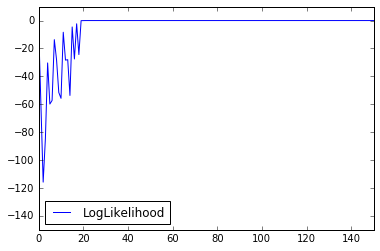

In [20]:
df = pd.DataFrame({'LogLikelihood':obj_history})
ax = df.plot()
ax.set_ylim(-150,10)

Régression logistique multinomiale (données discrètes)
======================================================

Lecture des données
-------------------

In [21]:
raw_dataset = open("../data/multiclass2.dat")

In [22]:
dataset = list([ line.split() for line in raw_dataset])
print(dataset)

[['x', 'x', 'x', 'A'], ['x', 'x', 'y', 'A'], ['x', 'x', 'z', 'A'], ['x', 'y', 'x', 'D'], ['x', 'y', 'y', 'B'], ['x', 'y', 'z', 'D'], ['x', 'z', 'x', 'D'], ['x', 'z', 'y', 'D'], ['x', 'z', 'z', 'C'], ['y', 'x', 'x', 'A'], ['y', 'x', 'y', 'D'], ['y', 'x', 'z', 'D'], ['y', 'y', 'x', 'B'], ['y', 'y', 'y', 'B'], ['y', 'y', 'z', 'B'], ['y', 'z', 'x', 'D'], ['y', 'z', 'y', 'D'], ['y', 'z', 'z', 'C'], ['z', 'x', 'x', 'A'], ['z', 'x', 'y', 'D'], ['z', 'x', 'z', 'D'], ['z', 'y', 'x', 'D'], ['z', 'y', 'y', 'B'], ['z', 'y', 'z', 'D'], ['z', 'z', 'x', 'C'], ['z', 'z', 'y', 'C'], ['z', 'z', 'z', 'C']]


In [23]:
X = [] 
Y = []
for line in dataset:
    features = line[:-1]                       #unigrams
    features.extend(zip(features,features[1:]))#bigrams
    X.append(features)                         #X = list of hashable symbols
    Y.append(line[-1])                         #Y = string (or hashable symbol)
print(X)
print(Y)

[['x', 'x', 'x', ('x', 'x'), ('x', 'x')], ['x', 'x', 'y', ('x', 'x'), ('x', 'y')], ['x', 'x', 'z', ('x', 'x'), ('x', 'z')], ['x', 'y', 'x', ('x', 'y'), ('y', 'x')], ['x', 'y', 'y', ('x', 'y'), ('y', 'y')], ['x', 'y', 'z', ('x', 'y'), ('y', 'z')], ['x', 'z', 'x', ('x', 'z'), ('z', 'x')], ['x', 'z', 'y', ('x', 'z'), ('z', 'y')], ['x', 'z', 'z', ('x', 'z'), ('z', 'z')], ['y', 'x', 'x', ('y', 'x'), ('x', 'x')], ['y', 'x', 'y', ('y', 'x'), ('x', 'y')], ['y', 'x', 'z', ('y', 'x'), ('x', 'z')], ['y', 'y', 'x', ('y', 'y'), ('y', 'x')], ['y', 'y', 'y', ('y', 'y'), ('y', 'y')], ['y', 'y', 'z', ('y', 'y'), ('y', 'z')], ['y', 'z', 'x', ('y', 'z'), ('z', 'x')], ['y', 'z', 'y', ('y', 'z'), ('z', 'y')], ['y', 'z', 'z', ('y', 'z'), ('z', 'z')], ['z', 'x', 'x', ('z', 'x'), ('x', 'x')], ['z', 'x', 'y', ('z', 'x'), ('x', 'y')], ['z', 'x', 'z', ('z', 'x'), ('x', 'z')], ['z', 'y', 'x', ('z', 'y'), ('y', 'x')], ['z', 'y', 'y', ('z', 'y'), ('y', 'y')], ['z', 'y', 'z', ('z', 'y'), ('y', 'z')], ['z', 'z', 'x',

Version vectorisée (vecteur creux)
----------------------------------

In [24]:
sys.path.append('../')
from SparseWeightVector import *


In [25]:
all_classes = list(set(Y))
print(all_classes)

['A', 'D', 'C', 'B']


In [26]:
def predict_probs(X,W):
    probs = np.array([exp(W.dot(X,y)) for y in all_classes])
    probs /= probs.sum()
    return probs
    

In [27]:
def predict_class_prob(X,W,y):
    
    probs = np.array([exp(W.dot(X,y)) for y in all_classes])
    probs /= probs.sum()
    return probs[all_classes.index(y)]

In [28]:
def loglikelihood(X,Y,W):
    LL = 0
    for x,y in zip(X,Y):
        LL += log(predict_class_prob(x,W,y))
    return LL
    

In [29]:
def estimate_params_vec(X,Y,alpha=0.05, max_epochs=50):
    
    weights = SparseWeightVector()
    print('objective:',loglikelihood(X,Y,weights))
    N = len(Y)
    
    for e in range(max_epochs):
        
        delta_ref  = SparseWeightVector()
        delta_pred = SparseWeightVector()
        
        #compute gradient
        for (x,y) in zip(X,Y):
            delta_ref += SparseWeightVector.code_phi(x,y) #NB: useless recomputations here 
            
            preds = predict_probs(x,weights)
            for idx,c in enumerate(all_classes):
                delta_pred += SparseWeightVector.code_phi(x,c) * preds[idx]
                
        #update (gradient ascent)
        weights += alpha*(delta_ref-delta_pred)
        print('objective:',loglikelihood(X,Y,weights))
        
    return weights
                    

In [30]:
params = estimate_params_vec(X,Y)

objective: -37.429947750237034
objective: -23.329686787594287
objective: -17.64606872668413
objective: -14.477273806995655
objective: -12.405986692151894
objective: -10.90091377029238
objective: -9.739541623713766
objective: -8.808966854947828
objective: -8.043618218930757
objective: -7.401701013621235
objective: -6.85490049697143
objective: -6.383184029602687
objective: -5.97189762429865
objective: -5.61003321253355
objective: -5.289139490133168
objective: -5.002608590196004
objective: -4.745192877110615
objective: -4.512668301987798
objective: -4.301594222582156
objective: -4.109138509887049
objective: -3.932947910869815
objective: -3.771050441548253
objective: -3.621780867506698
objective: -3.4837230974134195
objective: -3.3556651470297503
objective: -3.2365635688091614
objective: -3.1255150938958387
objective: -3.0217338292978346
objective: -2.924532776339769
objective: -2.8333087413431293
objective: -2.7475299317647512
objective: -2.6667256949795966
objective: -2.590477979117265
o

In [31]:
print(params)

phi(z,A) = 1 : w = -0.937797
phi(y&z,B) = 1 : w = -0.315830
phi(z&y,A) = 1 : w = -0.328008
phi(x,D) = 1 : w = 0.510765
phi(z,D) = 1 : w = 0.510765
phi(x&z,D) = 1 : w = 0.959668
phi(z,B) = 1 : w = -0.937797
phi(y,D) = 1 : w = 0.510765
phi(x,C) = 1 : w = -0.937797
phi(x&z,B) = 1 : w = -0.328008
phi(z&x,C) = 1 : w = -0.315830
phi(z,C) = 1 : w = 1.364828
phi(x,A) = 1 : w = 1.364828
phi(x&z,C) = 1 : w = -0.315830
phi(y&y,B) = 1 : w = 2.136882
phi(z&z,C) = 1 : w = 2.136882
phi(x&x,C) = 1 : w = -0.279029
phi(x&y,A) = 1 : w = -0.315830
phi(z&x,B) = 1 : w = -0.328008
phi(z&z,D) = 1 : w = -1.578825
phi(x&z,A) = 1 : w = -0.315830
phi(y&z,A) = 1 : w = -0.328008
phi(z&x,D) = 1 : w = 0.959668
phi(y&x,D) = 1 : w = 0.959668
phi(y&y,A) = 1 : w = -0.279029
phi(x&x,B) = 1 : w = -0.279029
phi(z&y,C) = 1 : w = -0.315830
phi(x,B) = 1 : w = -0.937797
phi(x&y,B) = 1 : w = -0.315830
phi(z&y,D) = 1 : w = 0.959668
phi(y&y,D) = 1 : w = -1.578825
phi(z&x,A) = 1 : w = -0.315830
phi(y,B) = 1 : w = 1.364828
phi(x&y,D